### Concepto de Árbol de Decisión

Un **Árbol de Decisión** es un algoritmo de aprendizaje supervisado que se puede usar para problemas de clasificación y regresión. Funciona dividiendo el conjunto de datos en subconjuntos cada vez más pequeños, basándose en preguntas sobre las características de los datos, hasta que el modelo alcanza una decisión final. Es como un diagrama de flujo donde cada nodo interno representa una prueba sobre una característica, cada rama es el resultado de la prueba y cada hoja es la decisión final.

### Nodos y Hojas

* **Nodo Raíz:** El nodo superior del árbol. Representa todo el conjunto de datos y el punto de inicio para tomar decisiones.
* **Nodos Internos:** Nodos intermedios que representan una prueba sobre una característica (por ejemplo, `acidez_fija > 8.0`). Cada nodo interno tiene ramas que conducen a otros nodos.
* **Nodos Hoja (Terminales):** Los nodos finales del árbol que no se dividen más. Cada hoja representa una clase o un valor de predicción.

### Criterios de División

En cada nodo, el algoritmo debe decidir qué característica usar para hacer la mejor división. La "mejor" división es aquella que produce los subconjuntos más "puros" o "limpios" en términos de la variable objetivo. Los criterios más comunes son:

#### Impureza de Gini

La Impureza de Gini mide la probabilidad de que una instancia seleccionada al azar sea clasificada incorrectamente. Una impureza de Gini de 0 significa que el nodo es completamente puro (todas las instancias pertenecen a la misma clase). El algoritmo busca la división que **minimiza** la Impureza de Gini.

La fórmula es:

$$Gini = 1 - \sum_{i=1}^{C} p(i)^2$$

donde $C$ es el número de clases y $p(i)$ es la proporción de instancias que pertenecen a la clase $i$ en el nodo.

#### Entropía y Ganancia de Información (Information Gain)

La Entropía mide la aleatoriedad o el desorden de un conjunto de datos. Cuanto mayor es la entropía, más mezcladas están las clases. La **Ganancia de Información** es la reducción en la entropía después de una división. El algoritmo busca la división que **maximiza** la Ganancia de Información.

La fórmula de la Entropía es:

$$Entropia = - \sum_{i=1}^{C} p(i) \log_2(p(i))$$

La fórmula de la Ganancia de Información es:

$$GananciaDeInformacion = Entropia(Padre) - \sum_{j} \frac{N_j}{N} Entropia(Hijo_j)$$

donde $N_j$ es el número de instancias en el hijo $j$ y $N$ es el número total de instancias en el nodo padre.

### Sobreajuste (Overfitting)

El sobreajuste es el principal problema de los árboles de decisión individuales. Ocurre cuando el árbol se vuelve demasiado complejo y profundo, aprendiendo no solo los patrones, sino también el "ruido" y las irregularidades de los datos de entrenamiento. Esto hace que el modelo funcione perfectamente en los datos de entrenamiento, pero tenga un rendimiento muy pobre en datos nuevos y no vistos.

El **Bosque Aleatorio** resuelve este problema al combinar muchos árboles de decisión independientes. Al promediar o votar los resultados de varios árboles entrenados con diferentes subconjuntos de datos, el efecto del sobreajuste de un solo árbol se reduce drásticamente, lo que resulta en un modelo más robusto y generalizado.


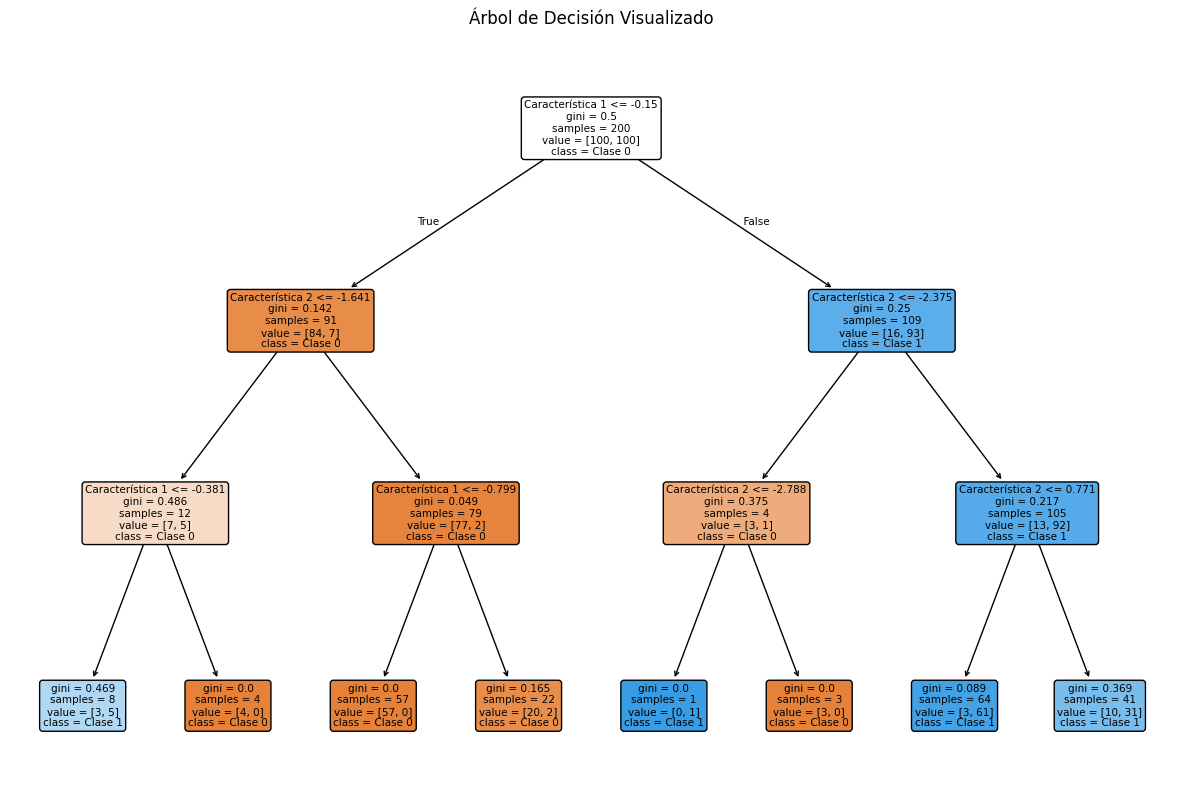

In [1]:
# Importamos las librerías necesarias
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Creamos un dataset de ejemplo con 200 muestras y 2 características
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Entrenamos un árbol de decisión con una profundidad máxima de 3 para evitar el sobreajuste
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(X, y)

# Visualizamos el árbol
plt.figure(figsize=(15, 10))
plot_tree(tree_classifier,
          filled=True,
          rounded=True,
          class_names=['Clase 0', 'Clase 1'],
          feature_names=['Característica 1', 'Característica 2'])
plt.title("Árbol de Decisión Visualizado")
plt.show()

# En la gráfica, los cuadros de colores son los nodos.
# - Las líneas indican las divisiones.
# - El texto "gini" o "entropy" es el criterio de división.
# - "samples" es la cantidad de datos en ese nodo.
# - "value" muestra la distribución de las clases.
# - "class" es la clase más predominante en ese nodo.